# 1. Import

In [1]:
# System
import sys
import os
import argparse
import itertools

# Time
import time
import datetime

# Numerical Data
import random
import numpy as np 
import pandas as pd

# Tools
import shutil
from glob import glob
from tqdm import tqdm
import gc

# NLP
import re

# Preprocessing
from sklearn import preprocessing
from sklearn.utils import class_weight as cw
from sklearn.utils import shuffle

# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Machine Learning Models
from sklearn import svm
from sklearn.svm import LinearSVC, SVC

# Evaluation Metrics
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score


# Deep Learning - Keras -  Preprocessing
from keras.preprocessing.image import ImageDataGenerator

# Deep Learning - Keras - Model
import keras
from keras import models
from keras.models import Model
from keras.models import load_model
from keras.models import Sequential

# Deep Learning - Keras - Layers
from keras.layers import Convolution1D, concatenate, SpatialDropout1D, GlobalMaxPool1D, GlobalAvgPool1D, Embedding, \
    Conv2D, SeparableConv1D, Add, BatchNormalization, Activation, GlobalAveragePooling2D, LeakyReLU, Flatten
from keras.layers import Dense, Input, Dropout, MaxPool2D, MaxPooling2D, Concatenate, GlobalMaxPooling2D, GlobalAveragePooling2D, \
    Lambda, Multiply, LSTM, Bidirectional, PReLU, MaxPooling1D
from keras.layers.pooling import _GlobalPooling1D

from keras.regularizers import l2

# Deep Learning - Keras - Pretrained Models
from keras.applications.xception import Xception
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.densenet import DenseNet201
from keras.applications.nasnet import NASNetMobile, NASNetLarge

from keras.applications.nasnet import preprocess_input

# Deep Learning - Keras - Model Parameters and Evaluation Metrics
from keras import optimizers
from keras.optimizers import Adam, SGD , RMSprop
from keras.losses import mae, sparse_categorical_crossentropy, binary_crossentropy

# Deep Learning - Keras - Visualisation
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau, LearningRateScheduler
# from keras.wrappers.scikit_learn import KerasClassifier
from keras import backend as K

# Deep Learning - TensorFlow
import tensorflow as tf

# Graph/ Visualization
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.image as mpimg
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix

# Image
import cv2
from PIL import Image
from IPython.display import display

# np.random.seed(42)

%matplotlib inline

# Input data
print(os.listdir("../input/"))


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


['corona-virus-time-series-dataset']
/kaggle/input/corona-virus-time-series-dataset/time_series_19-covid-Deaths.csv
/kaggle/input/corona-virus-time-series-dataset/time_series_19-covid-Confirmed.csv
/kaggle/input/corona-virus-time-series-dataset/time_series_19-covid-Recovered.csv


# 2. Read Data

In [5]:
time_series_covid_19_confirmed = pd.read_csv("../input/corona-virus-time-series-dataset/time_series_19-covid-Confirmed.csv")
time_series_covid_19_recovered = pd.read_csv("../input/corona-virus-time-series-dataset/time_series_19-covid-Recovered.csv")
time_series_covid_19_deaths = pd.read_csv("../input/corona-virus-time-series-dataset/time_series_19-covid-Deaths.csv")

In [6]:
time_series_covid_19_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20
0,Anhui,Mainland China,31.82571,117.2264,1,9,15,39,60,70,...,962,973,982,986,987,988,989,989,989,989
1,Beijing,Mainland China,40.18238,116.4142,14,22,36,41,68,80,...,380,381,387,393,395,396,399,399,399,400
2,Chongqing,Mainland China,30.05718,107.8740,6,9,27,57,75,110,...,551,553,555,560,567,572,573,575,576,576
3,Fujian,Mainland China,26.07783,117.9895,1,5,10,18,35,59,...,287,290,292,293,293,293,293,293,293,294
4,Gansu,Mainland China,36.06110,103.8343,0,2,2,4,7,14,...,90,91,91,91,91,91,91,91,91,91


In [7]:
time_series_covid_19_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20
0,Anhui,Mainland China,31.82571,117.2264,0,0,0,0,0,0,...,255,280,361,413,474,539,597,637,663,712
1,Beijing,Mainland China,40.18238,116.4142,0,0,1,2,2,2,...,108,114,122,145,153,169,178,189,198,215
2,Chongqing,Mainland China,30.05718,107.8740,0,0,0,0,0,0,...,207,225,254,274,299,316,328,335,349,372
3,Fujian,Mainland China,26.07783,117.9895,0,0,0,0,0,0,...,82,90,93,112,126,149,162,170,183,199
4,Gansu,Mainland China,36.06110,103.8343,0,0,0,0,0,0,...,54,58,62,65,71,76,76,78,80,80


In [8]:
time_series_covid_19_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20
0,Anhui,Mainland China,31.82571,117.2264,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
1,Beijing,Mainland China,40.18238,116.4142,0,0,0,0,0,1,...,4,4,4,4,4,4,4,4,4,4
2,Chongqing,Mainland China,30.05718,107.8740,0,0,0,0,0,0,...,5,5,5,5,6,6,6,6,6,6
3,Fujian,Mainland China,26.07783,117.9895,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
4,Gansu,Mainland China,36.06110,103.8343,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [9]:
columns = time_series_covid_19_confirmed.columns.tolist()
rej_columns = ['Province/State', 'Country/Region', 'Lat', 'Long']
data_cols = [c for c in columns if c not in rej_columns]

In [12]:
# print("Number of days of outbreak recorded      : %d"%(len(time_series_covid_19_confirmed.ObservationDate.unique())))
print("Number of countries with outbreak        : %d"%(len(time_series_covid_19_confirmed["Country/Region"].unique())))
print("Number of Province/State with outbreak   : %d"%(len(time_series_covid_19_confirmed["Province/State"].unique())))

Number of countries with outbreak        : 42
Number of Province/State with outbreak   : 62


In [13]:
confirm_country = time_series_covid_19_confirmed["Country/Region"].unique()
confirm_country.sort()

print(" Number of country with outbreak: %d"%(len(confirm_country)))
print("\n Following are the countries with outbreak:\n")

i = 1
for c in confirm_country:
    print(" %.2d : %s"%(i, c))
    i+=1

 Number of country with outbreak: 42

 Following are the countries with outbreak:

 01 : Afghanistan
 02 : Algeria
 03 : Australia
 04 : Austria
 05 : Bahrain
 06 : Belgium
 07 : Cambodia
 08 : Canada
 09 : Croatia
 10 : Egypt
 11 : Finland
 12 : France
 13 : Germany
 14 : Hong Kong
 15 : India
 16 : Iran
 17 : Iraq
 18 : Israel
 19 : Italy
 20 : Japan
 21 : Kuwait
 22 : Lebanon
 23 : Macau
 24 : Mainland China
 25 : Malaysia
 26 : Nepal
 27 : Oman
 28 : Others
 29 : Philippines
 30 : Russia
 31 : Singapore
 32 : South Korea
 33 : Spain
 34 : Sri Lanka
 35 : Sweden
 36 : Switzerland
 37 : Taiwan
 38 : Thailand
 39 : UK
 40 : US
 41 : United Arab Emirates
 42 : Vietnam


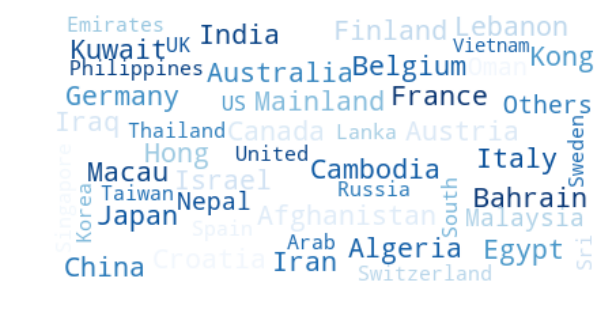

In [14]:
from wordcloud import WordCloud

ticksize = 20
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 5)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)


text = ""
for c in confirm_country:
    text += c + " "

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

wordcloud = WordCloud(max_font_size=20, background_color="white", colormap="Blues").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [24]:
import operator

state_province_country_map = {}

for index, row in time_series_covid_19_confirmed.iterrows():
    state_province_country_map[row["Province/State"]] = row["Country/Region"]

state_province_country_map = sorted(state_province_country_map.items(), key=operator.itemgetter(1), reverse=False)
state_province_country_map = { i:j for i,j in state_province_country_map }

print(" Following are the states with outbreak: \n")
for key in state_province_country_map:
    print("%20s : %s" % (state_province_country_map[key], key))

 Following are the states with outbreak: 

           Australia : New South Wales
           Australia : Victoria
           Australia : Queensland
           Australia : South Australia
             Austria : None
              Canada : Toronto, ON
              Canada : British Columbia
              Canada : London, ON
           Hong Kong : Hong Kong
              Israel : From Diamond Princess
               Macau : Macau
      Mainland China : Anhui
      Mainland China : Beijing
      Mainland China : Chongqing
      Mainland China : Fujian
      Mainland China : Gansu
      Mainland China : Guangdong
      Mainland China : Guangxi
      Mainland China : Guizhou
      Mainland China : Hainan
      Mainland China : Hebei
      Mainland China : Heilongjiang
      Mainland China : Henan
      Mainland China : Hubei
      Mainland China : Hunan
      Mainland China : Inner Mongolia
      Mainland China : Jiangsu
      Mainland China : Jiangxi
      Mainland China : Jilin
      Mainl

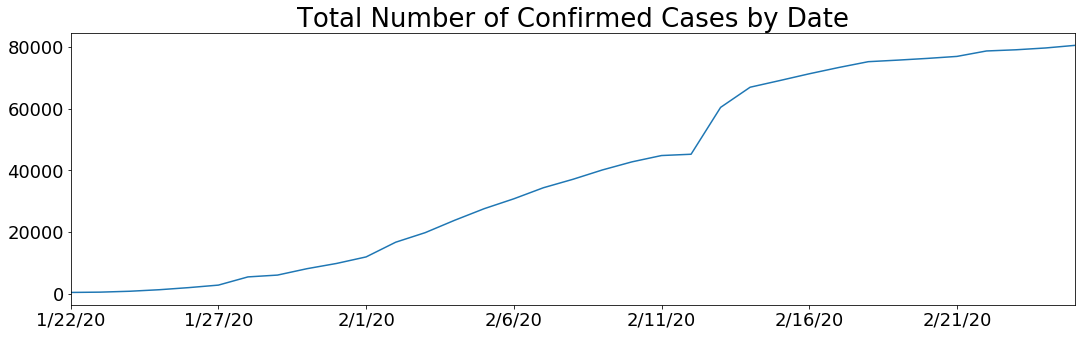

In [25]:
ticksize = 18
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 5)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)

title = "Total Number of Confirmed Cases by Date"

time_series_covid_19_confirmed[data_cols].sum().plot()
plt.title(title)
plt.show()

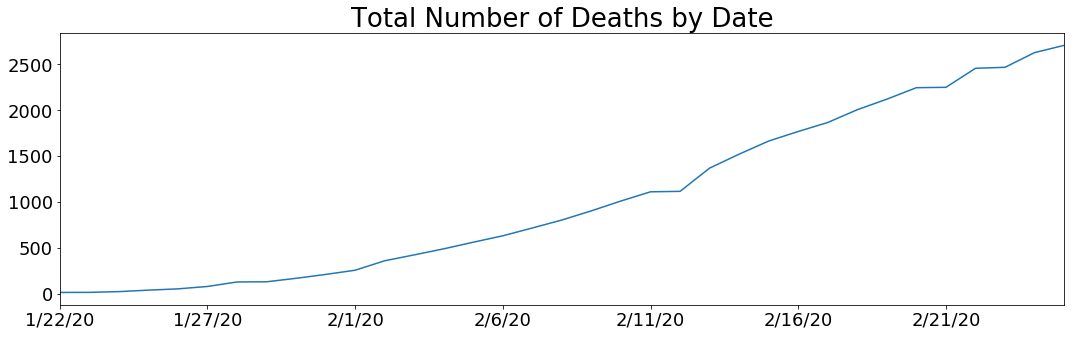

In [26]:
ticksize = 18
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 5)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)

title = "Total Number of Deaths by Date"

time_series_covid_19_deaths[data_cols].sum().plot()
plt.title(title)
plt.show()

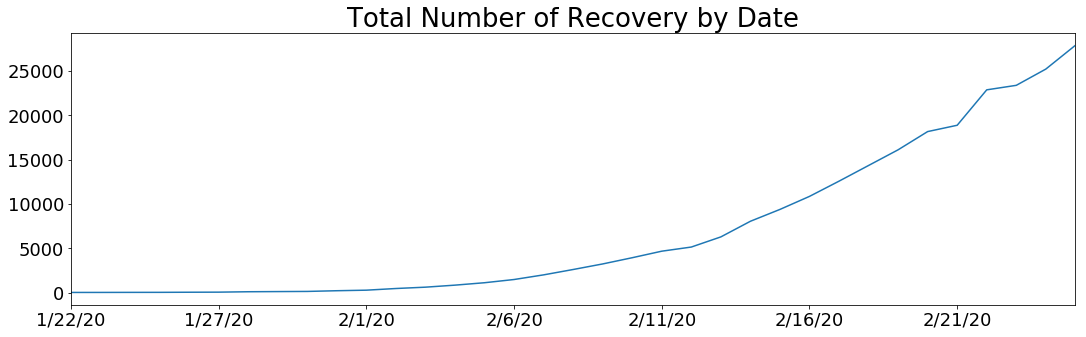

In [27]:
ticksize = 18
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 5)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)

title = "Total Number of Recovery by Date"

time_series_covid_19_recovered[data_cols].sum().plot()
plt.title(title)
plt.show()